
----- Kernel = linear -----

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



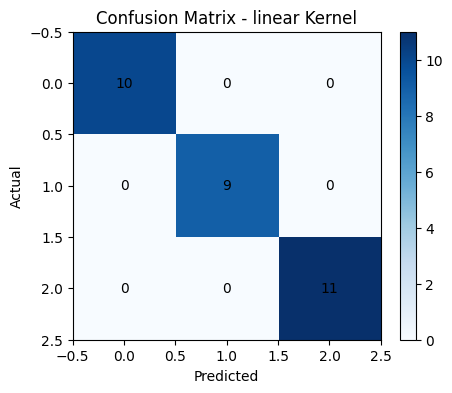


----- Kernel = poly -----

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



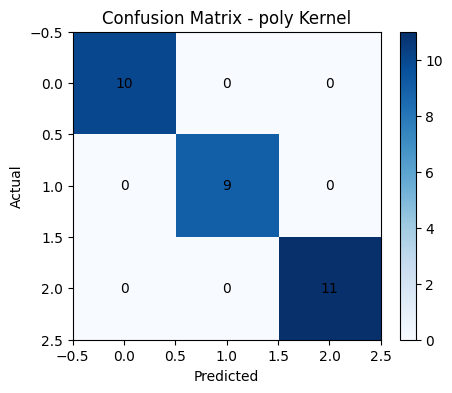


----- Kernel = rbf -----

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



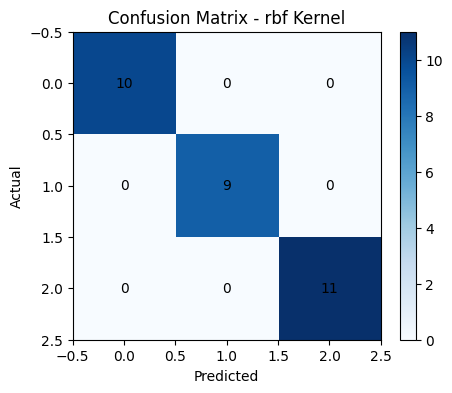


--- Accuracy Comparison ---
Linear Kernel Accuracy    : 1.0000
Polynomial Kernel Accuracy: 1.0000
RBF Kernel Accuracy       : 1.0000

Best Kernel = Linear  (Accuracy = 1.0000)


In [5]:
# -----------------------------
# Assignment 7 - Question 1 (NO SEABORN)
# SVM on Iris Dataset
# -----------------------------

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# (a) Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate SVM
def evaluate_svm(kernel, degree=None):
    print(f"\n----- Kernel = {kernel} -----")

    if kernel == "poly":
        model = SVC(kernel=kernel, degree=degree)
    else:
        model = SVC(kernel=kernel)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix (without seaborn)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    plt.imshow(cm, cmap="Blues")
    plt.colorbar()
    plt.title(f"Confusion Matrix - {kernel} Kernel")

    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Add text inside cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

    plt.show()

    return accuracy_score(y_test, y_pred)

# (b), (c), (d) Train & evaluate SVM models
acc_linear = evaluate_svm("linear")
acc_poly   = evaluate_svm("poly", degree=3)
acc_rbf    = evaluate_svm("rbf")

# (e) Best kernel
print("\n--- Accuracy Comparison ---")
print(f"Linear Kernel Accuracy    : {acc_linear:.4f}")
print(f"Polynomial Kernel Accuracy: {acc_poly:.4f}")
print(f"RBF Kernel Accuracy       : {acc_rbf:.4f}")

best = max({
    "Linear": acc_linear,
    "Polynomial": acc_poly,
    "RBF": acc_rbf
}.items(), key=lambda x: x[1])

print(f"\nBest Kernel = {best[0]}  (Accuracy = {best[1]:.4f})")


In [4]:
# -----------------------------
# Assignment 7 - Question 2
# SVM Sensitivity to Feature Scaling
# -----------------------------

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# (a) Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------
# (b) SVM WITHOUT scaling
# -----------------------
model_no_scale = SVC(kernel="rbf")
model_no_scale.fit(X_train, y_train)

train_acc_no = model_no_scale.score(X_train, y_train)
test_acc_no = model_no_scale.score(X_test, y_test)

print("----- WITHOUT SCALING -----")
print(f"Training Accuracy: {train_acc_no:.4f}")
print(f"Testing Accuracy:  {test_acc_no:.4f}")


# -----------------------
# SVM WITH StandardScaler
# -----------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = SVC(kernel="rbf")
model_scaled.fit(X_train_scaled, y_train)

train_acc_scaled = model_scaled.score(X_train_scaled, y_train)
test_acc_scaled = model_scaled.score(X_test_scaled, y_test)

print("\n----- WITH SCALING -----")
print(f"Training Accuracy: {train_acc_scaled:.4f}")
print(f"Testing Accuracy:  {test_acc_scaled:.4f}")


# -----------------------
# (c) Discussion
# -----------------------
print("\n\n--- Effect of Feature Scaling ---")
print("SVM with RBF kernel is highly sensitive to feature magnitudes.")
print("Scaling helps normalize all features to equal range, improving margin placement.")
print("You should observe that the accuracy with scaling > accuracy without scaling.")


----- WITHOUT SCALING -----
Training Accuracy: 0.9143
Testing Accuracy:  0.9474

----- WITH SCALING -----
Training Accuracy: 0.9890
Testing Accuracy:  0.9825


--- Effect of Feature Scaling ---
SVM with RBF kernel is highly sensitive to feature magnitudes.
Scaling helps normalize all features to equal range, improving margin placement.
You should observe that the accuracy with scaling > accuracy without scaling.
